# Imports and aux functions

In [186]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import SimpleRNN
np.set_printoptions(threshold=np.inf)

In [187]:
def round_to_nearest(number, lower_limit, upper_limit):
    diff_lower = abs(number - lower_limit)
    diff_upper = abs(number - upper_limit)
    
    if diff_lower < diff_upper:
        return lower_limit
    else:
        return upper_limit

def mean_squared_difference(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length")
    
    squared_differences = [(x - y) ** 2 for x, y in zip(list1, list2)]
    mean_squared_diff = sum(squared_differences) / len(list1)
    
    return mean_squared_diff

def accuracy(true_labels, predicted_labels):
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Lists must have the same length")
    
    correct_predictions = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
    total_predictions = len(true_labels)
    
    accuracy_value = correct_predictions / total_predictions
    return accuracy_value

def select_nth_elements(lists, n):
    selected_elements = [lst[n] for lst in lists]
    return selected_elements

# ANN to predict thickness of target

## Data preparing

In [188]:
with open('data2.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('labels2.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
y = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    y.append(float_values)

del y[len(y)-1]

Blue graph: Thick:683.393981875602 Particle: 1.0 Energy: 1908.5245204072744 Scatter angle: 140.0
Orange graph: Thick:665.3010793613234 Particle: 0.0 Energy: 1821.0809956552685 Scatter angle: 165.0


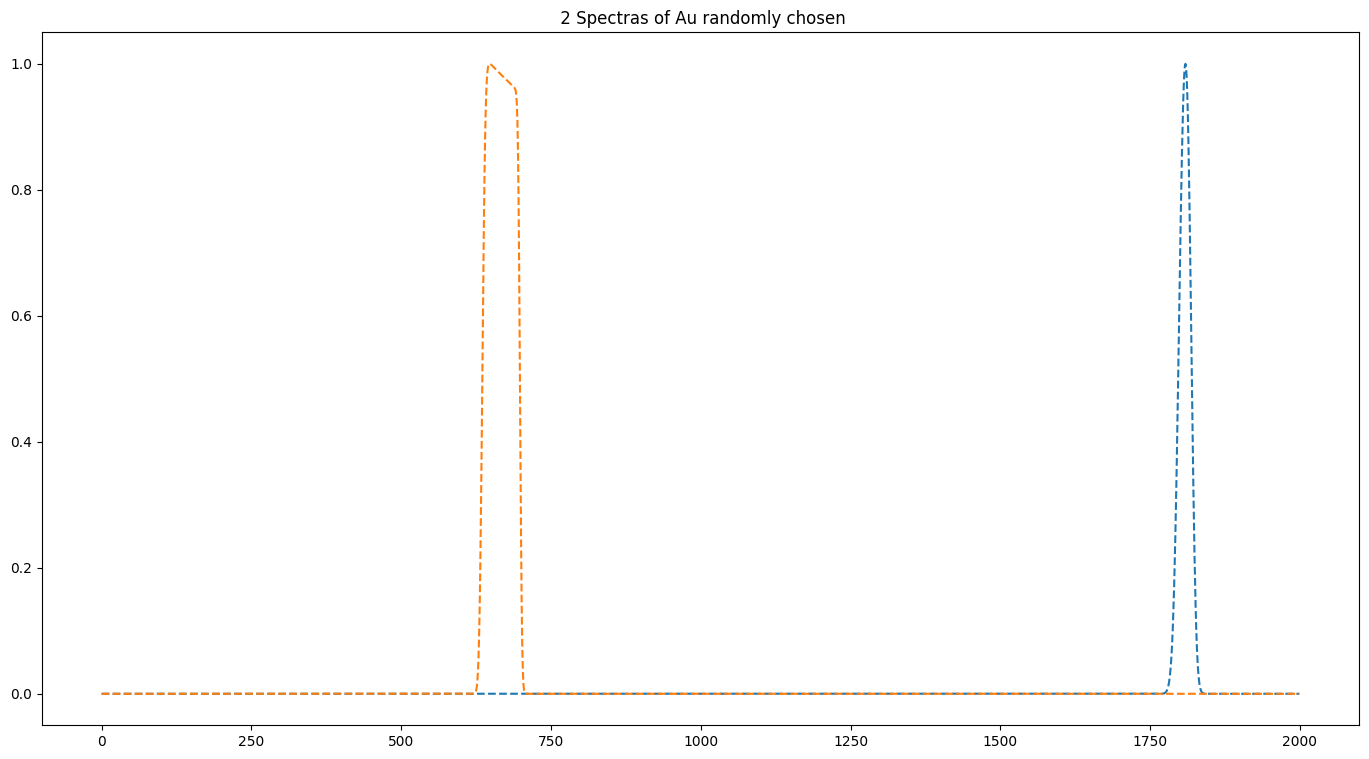

In [201]:
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X=np.array(Xx)
Y=np.array(y)

a=np.random.randint(0,len(X))
b=np.random.randint(0,len(X))
xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
plt.plot(xaxis,X[a],'--')
print('Blue graph: Thick:'+str(Y[a][0])+' Particle: '+str(Y[a][1])+ ' Energy: '+str(Y[a][2])+' Scatter angle: '+str(Y[a][3]))
plt.plot(xaxis,X[b],'--')
print('Orange graph: Thick:'+str(Y[b][0])+' Particle: '+str(Y[b][1])+' Energy: '+str(Y[b][2])+' Scatter angle: '+str(Y[b][3]))
plt.title(' 2 Spectras of Au randomly chosen')
plt.show()

In [229]:
random_state=np.random.randint(0,50)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=40,random_state=random_state)
print(random_state)

31


## RNN testing


In [ ]:
original_shape = X_train.shape
X_trainreshape = X_train.reshape((original_shape[0], 1, original_shape[1]))
original_shape = X_test.shape
X_testreshape = X_test.reshape((original_shape[0], 1, original_shape[1]))
epochs = 75
batch_size = 32

random_state=np.random.randint(0,50)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=40,random_state=random_state)
print(random_state)

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model=keras.models.Sequential(
    [keras.layers.SimpleRNN(150,input_shape=(1,2000),return_sequences=True),
    keras.layers.Dense(50,activation= 'relu'),
    keras.layers.Dense(4,activation='linear')])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
#model.summary()


model.fit(X_trainreshape,y_train,epochs=epochs,batch_size=batch_size,verbose=0,callbacks=[callback])


loss, mae = model.evaluate(X_testreshape, y_test)
print("Mean Absolute Error:", mae)


predictions=model.predict(X_testreshape)
predictions = predictions.reshape(40, 4)
for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)
    predictions[i][3]=round_to_nearest(predictions[i][3], 140,165)


    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('Prediction: ' + str(predictions[i][0]) + '. Real value: ' + str(y_test[i][0]))
    print(': ')
    print('Prediction: ' + str(predictions[i][1]) + '. Real value: ' + str(y_test[i][1]))
    print('Energy: ')
    print('Prediction: ' + str(predictions[i][2]) + '. Real value: ' + str(y_test[i][2]))
    print()
    print()


print()
print()
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))
print(accuracy(select_nth_elements(y_test, 3),select_nth_elements(predictions, 3)))


callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model=keras.models.Sequential(
    [keras.layers.SimpleRNN(150,input_shape=(1,2000),return_sequences=True),
    keras.layers.Dense(50,activation= 'relu'),
    keras.layers.Dense(4,activation='linear')])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
#model.summary()


model.fit(X_trainreshape,y_train,epochs=epochs,batch_size=batch_size,verbose=0,callbacks=[callback])


loss, mae = model.evaluate(X_testreshape, y_test)
print("Mean Absolute Error:", mae)


predictions=model.predict(X_testreshape)
predictions = predictions.reshape(40, 4)
for i in range(len(predictions)):
    #predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)
    #predictions[i][3]=round_to_nearest(predictions[i][3], 140,165)


    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('Prediction: ' + str(predictions[i][0]) + '. Real value: ' + str(y_test[i][0]))
    print(': ')
    print('Prediction: ' + str(predictions[i][1]) + '. Real value: ' + str(y_test[i][1]))
    print('Energy: ')
    print('Prediction: ' + str(predictions[i][2]) + '. Real value: ' + str(y_test[i][2]))
    print('Angle: ')
    print('Prediction: ' + str(predictions[i][3]) + '. Real value: ' + str(y_test[i][3]))
    print()
    print()


print()
print()
print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))
print(accuracy(select_nth_elements(y_test, 3),select_nth_elements(predictions, 3)))

## FCNN testing

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=15)
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(2000,)),
     keras.layers.Dense(80,activation='relu'),
     keras.layers.Dense(3,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32
#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)

for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)

'''
    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('Prediction: ' + str(predictions[i][0]) + '. Real value: ' + str(y_test[i][0]))
    print(': ')
    print('Prediction: ' + str(predictions[i][1]) + '. Real value: ' + str(y_test[i][1]))
    print('Energy: ')
    print('Prediction: ' + str(predictions[i][2]) + '. Real value: ' + str(y_test[i][2]))
    print()
    print()

'''
print()
print()

print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))

model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(2000,)),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(3,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

#model.summary()
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0,callbacks=[callback])

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
predictions=model.predict(X_test)

for i in range(len(predictions)):
    predictions[i][1]=round_to_nearest(predictions[i][1], 0, 1)

'''
    print('Target '+str(i+1)+' :')
    print('Thickness: ')
    print('Prediction: ' + str(predictions[i][0]) + '. Real value: ' + str(y_test[i][0]))
    print(': ')
    print('Prediction: ' + str(predictions[i][1]) + '. Real value: ' + str(y_test[i][1]))
    print('Energy: ')
    print('Prediction: ' + str(predictions[i][2]) + '. Real value: ' + str(y_test[i][2]))
    print()
    print()

'''
print()
print()

print(mean_squared_difference(select_nth_elements(y_test, 0),select_nth_elements(predictions, 0)))
print(accuracy(select_nth_elements(y_test, 1),select_nth_elements(predictions, 1)))
print(mean_squared_difference(select_nth_elements(y_test, 2),select_nth_elements(predictions, 2)))